Midten av legemet treffer 60 grader etter 39750 tidssteg, 39.750 sekunder, og da er temperaturen 60.173 grader.


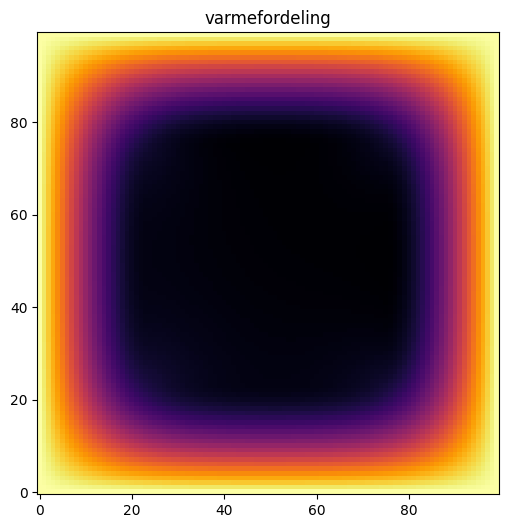

In [ ]:
#denne jupyter notebooken er laget fordi den andre var tungvindt å jobbe med
#legit ignorer begge, ikke nøye

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy.linalg as la


xsize = 26  # cm
ysize = 26  # cm
objectsize = 10  # cm
m = 100  #antall punkter x
n = 100  #antall punkter y
dx = xsize / (m+1) 
dy = ysize / (n+1)
dt = 0.001  #tid/steg
steps = 40000 #antall steg
tid = dt*steps #total tid

obj = (slice(int((m-2)/4),int(n-(n-2)/4)),slice(int((m-2)/4),int(n-(n-2)/4)))

d_obj = 12.90 #MÅ VÆRE I CM^2/S
d_luft = 0.22 #MÅ VÆRE I CM^2/S

x = np.linspace(0, xsize, m+2)
y = np.linspace(0, ysize, n+2)

U0 = np.ones((m, n)) * 15 
U0[:, 0] = U0[:, -1] = 200
U0[0, :] = U0[-1, :] = 200

#deriverer for uxx og uyy, og setter inn i diffusjonslikningen,
def f(u):
    u_xx = (np.roll(u, -1, axis=0) - 2 * u + np.roll(u, 1, axis=0)) / dx**2
    u_yy = (np.roll(u, -1, axis=1) - 2 * u + np.roll(u, 1, axis=1)) / dy**2
    u_new = d_luft * (u_xx + u_yy)
    u_new[obj] = d_obj * (u_xx[obj] + u_yy[obj])
    return u_new

def euler(U, dt, steps):
    u = np.copy(U)
    for _ in range(steps):
        u += dt * f(u)
        u[:, 0] = u[:, -1] = 200
        u[0, :] = u[-1, :] = 200
    return u

ims = []

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title("varmefordeling")

for i in range(0, steps, 750): 
    u_step = euler(U0, dt, i)
    if u_step[int(m/2),int(n/2)] <= 60:
        indeks = i-1500
    im = ax.imshow(u_step, cmap='inferno', animated=True, origin='lower')
    ims.append([im])

u_step = euler(U0, dt, indeks)

while u_step[int(m/2),int(n/2)] < 60:
    u_step = euler(U0, dt, indeks)
    indeks += 50

u_step = euler(U0, dt, indeks)

print(f"Midten av legemet treffer 60 grader etter {i} tidssteg, {i*dt:.3f} sekunder, og da er temperaturen {u_step[int(m/2),int(n/2)]:.3f} grader.")


ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_jshtml())
